# Part 2 - Mapping Yelp Search Results

## Obective

- For this CodeAlong, we will be working with the Yelp API results from last class. 
- You will load in the .csv.gz of your yelp results and prepare the data for visualization.
- You will use Plotly Express to create an interactive map with all of the results.

## Tools You Will Use
- Part 1:
    - Yelp API:
        - Getting Started: 
            - https://www.yelp.com/developers/documentation/v3/get_started

    - `YelpAPI` python package
        -  "YelpAPI": https://github.com/gfairchild/yelpapi
- Part 2:

    - Plotly Express: https://plotly.com/python/getting-started/
        - With Mapbox API: https://www.mapbox.com/
        - `px.scatter_mapbox` [Documentation](https://plotly.com/python/scattermapbox/): 




### Applying Code From
- [Advanced Transformations with Pandas - Part 1](https://login.codingdojo.com/m/376/12529/88086)
- [Advanced Transformations with Pandas - Part 2](https://login.codingdojo.com/m/376/12529/88088)

### Goal

- We want to create a map with every restaurant plotted as a scatter plot with detailed information that appears when we hover over a business
- We will use plotly express's `px.scatter_mapbox` function to accomplish this.
    - https://plotly.com/python/scattermapbox/
    
    - Some of the options require a Mapbox API token:
    - However, we will be using the options that DO NOT require a token.
        - https://studio.mapbox.com/
    

# Loading Data from Part 1

In [ ]:
## Plotly is not included in your dojo-env
!pip install plotly

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

## importing plotly 
import plotly.express as px

In [2]:
## Load in csv.gz
df = pd.read_csv('Data/Seattle-barbecue.csv.gz')
df.head()

id                        alias                name  \
0  f4rnFr_bFWOB44crXfFMbQ        j-and-l-bbq-snohomish           J & L BBQ   
1  GAq0SZKYEeWN71hC0FHYrQ          j-and-l-bbq-everett           J & L BBQ   
2  ZIRJB-lk5cD4L8GUOca3zw          fat-pig-bbq-edmonds         Fat Pig BBQ   
3  njvyS8D09NfOhIDbEjNhEg  larrys-smokehouse-snohomish  Larry's Smokehouse   
4  D_ClecX3hizRwnQyamtf6g   carolina-smoke-bbq-bothell  Carolina Smoke BBQ   

                                           image_url  is_closed  \
0  https://s3-media1.fl.yelpcdn.com/bphoto/2z6_9B...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/OTdSHc...      False   
2  https://s3-media2.fl.yelpcdn.com/bphoto/Xdbg4J...      False   
3  https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/j-and-l-bbq-snohomish...           298   
1  https://www.yelp.com/biz/j-and-l-bbq-everett?a...           137   
2  https://www.yelp.com/biz/fat-pig-bbq-edmonds?a...           289   
3  https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4  https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   

                                          categories  rating  \
0            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
1  [{'alias': 'tradamerican', 'title': 'American'...     4.5   
2            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
3  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4            [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   

                                         coordinates            transactions  \
0    {'latitude': 47.91278, 'longitude': -122.09882}  ['pickup', 'delivery']   
1    {'latitude': 47.97862, 'longitude': -122.20819}            ['delivery']   
2  {'latitude': 47.8315724, 'longitude': -122.336...  ['pickup', 'delivery']   
3  {'latitude': 47.839407, 'longitude': -122.124891}  ['pickup', 'delivery']   
4  {'latitude': 47.7784982305512, 'longitude': -1...  ['pickup', 'delivery']   

  price                                           location         phone  \
0    $$  {'address1': '130 Ave D', 'address2': None, 'a...  1.360569e+10   
1    $$  {'address1': '2915 Colby Ave', 'address2': '',...  1.425259e+10   
2    $$  {'address1': '7533 Olympic View Dr', 'address2...  1.425362e+10   
3     $  {'address1': '17416 State Route 9', 'address2'...  1.425484e+10   
4    $$  {'address1': '24118 Bothell Everett Hwy', 'add...  1.425950e+10   

    display_phone      distance  
0  (360) 568-7222  10622.755887  
1  (425) 259-3222  14830.981444  
2  (425) 361-7640  10346.304888  
3  (425) 483-7001   5611.595646  
4  (425) 949-8672   7573.454942

## Required Preprocessing 

- 1. We need to get the latitude and longitude for each business as separate columns.
- 2. We also want to be able to show the restaurants:
    - name
    - price
    - type of transactions (pickup/delivery)
    - address

### Separating Latitude and Longitude

In [3]:
## use .apply pd.Series to convert a dict to columns
df['coordinates'].apply(pd.Series)

0
0      {'latitude': 47.91278, 'longitude': -122.09882}
1      {'latitude': 47.97862, 'longitude': -122.20819}
2    {'latitude': 47.8315724, 'longitude': -122.336...
3    {'latitude': 47.839407, 'longitude': -122.124891}
4    {'latitude': 47.7784982305512, 'longitude': -1...
..                                                 ...
715  {'latitude': 47.7386396296794, 'longitude': -1...
716     {'latitude': 47.7116, 'longitude': -122.19006}
717  {'latitude': 47.8206672668457, 'longitude': -1...
718  {'latitude': 47.7595325942869, 'longitude': -1...
719    {'latitude': 47.97956, 'longitude': -122.21399}

[720 rows x 1 columns]

- Why didn't that work???

In [4]:
## slice out a single test coordinate
test_coord = df.loc[1, 'coordinates']
test_coord

"{'latitude': 47.97862, 'longitude': -122.20819}"

- Its not a dictionary anymore!!! What??
    - CSV files cant store iterables (lists, dictionaries) so they get converted to strings.

### Fixing the String-Dictionaries

- The json module has another version of load and dump called `json.loads` and `json.dumps`
    - These are designed to process STRINGS instead of files. 
    
- If we use `json.loads` we can convert our `string dictionary` into an `actual dictionary`. 

In [5]:
## Use json.loads on the test coordinate
json.loads(test_coord)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

### JSON requires double quotes!
We got a `JSON Decode Error` because JSON was `expecting double quotes` inside
of the dictionary

In [6]:
# Check the single record
test_coord

"{'latitude': 47.97862, 'longitude': -122.20819}"

### We are now going to use the .replace( ) function to replace single ' with double "

In [7]:
## replace single ' with double " 
test_coord = test_coord.replace("'", '"')
test_coord

'{"latitude": 47.97862, "longitude": -122.20819}'

In [8]:
## Use json.loads on the test coordinate, again
json.loads(test_coord)

{'latitude': 47.97862, 'longitude': -122.20819}

In [9]:
# viewing type after using json.loads
type(json.loads(test_coord))

dict

### Now, how can we apply this same process to the entire column??

In [10]:
## replace ' with " (entire column)
df['coordinates'] = df['coordinates'].str.replace("'", '"')
## apply json.loads
df['coordinates'] = df['coordinates'].apply(json.loads)

In [11]:
## slice out a single test coordinate
test_coord = df.loc[5, 'coordinates']
test_coord

{'latitude': 47.88238744275234, 'longitude': -122.24173874559924}

In [12]:
type(test_coord)

dict

### Using .apply with pd.Series to convert a dictionary column into multiple columns
This is the process of unpacking the dictionary to columns

In [13]:
## use .apply pd.Series to convert a dict to columns
df['coordinates'].apply(pd.Series)

latitude   longitude
0    47.912780 -122.098820
1    47.978620 -122.208190
2    47.831572 -122.336643
3    47.839407 -122.124891
4    47.778498 -122.218753
..         ...         ...
715  47.738640 -122.345825
716  47.711600 -122.190060
717  47.820667 -122.299294
718  47.759533 -122.313203
719  47.979560 -122.213990

[720 rows x 2 columns]

In [14]:
## Concatenate the 2 new columns and drop the original.
df = pd.concat([df, df['coordinates'].apply(pd.Series)], axis = 1)
#df = df.drop(columns = 'coordinates')
df.head(2)

id                  alias       name  \
0  f4rnFr_bFWOB44crXfFMbQ  j-and-l-bbq-snohomish  J & L BBQ   
1  GAq0SZKYEeWN71hC0FHYrQ    j-and-l-bbq-everett  J & L BBQ   

                                           image_url  is_closed  \
0  https://s3-media1.fl.yelpcdn.com/bphoto/2z6_9B...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/OTdSHc...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/j-and-l-bbq-snohomish...           298   
1  https://www.yelp.com/biz/j-and-l-bbq-everett?a...           137   

                                          categories  rating  \
0            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
1  [{'alias': 'tradamerican', 'title': 'American'...     4.5   

                                       coordinates            transactions  \
0  {'latitude': 47.91278, 'longitude': -122.09882}  ['pickup', 'delivery']   
1  {'latitude': 47.97862, 'longitude': -122.20819}            ['delivery']   

  price                                           location         phone  \
0    $$  {'address1': '130 Ave D', 'address2': None, 'a...  1.360569e+10   
1    $$  {'address1': '2915 Colby Ave', 'address2': '',...  1.425259e+10   

    display_phone      distance  latitude  longitude  
0  (360) 568-7222  10622.755887  47.91278 -122.09882  
1  (425) 259-3222  14830.981444  47.97862 -122.20819

In [15]:
df = df.drop(columns = 'coordinates')

### Activity -Padlet : Unpacking dictionary

- https://padlet.com/pkansara/unpacking-ditionaries-qhjturi4ojzob5qv

## Creating a Simple Map

- Mapbox API: https://www.mapbox.com/
- Mapbox API Documentation: https://docs.mapbox.com/api/overview/

- Use the plotly express `scatter_mapbox` function

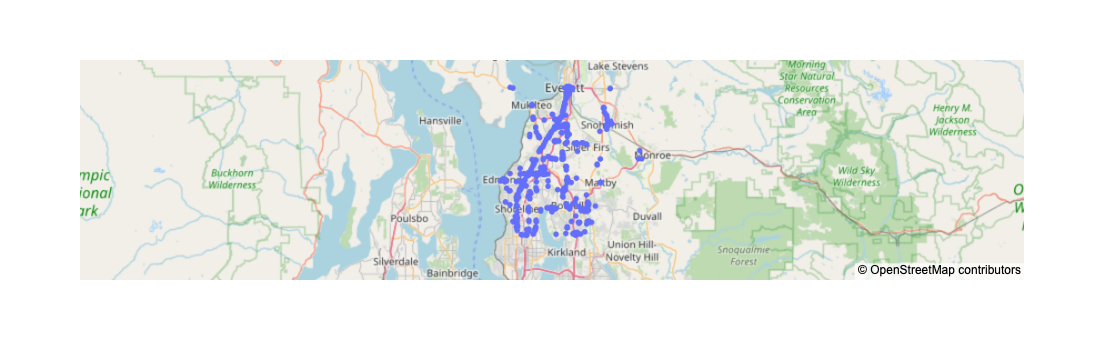

In [16]:
## use scatter_mapbox for map
px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', mapbox_style = 'open-street-map')

### Adding Hover Data

- We want to show the restaurants:
    - name
    - price range
    - rating
    - transaction type (delivery/takeout)
    - address
    
    
- We can use the `hover_name` and `hover_data` arguments for `px.scatter_mapbox` to add this info!

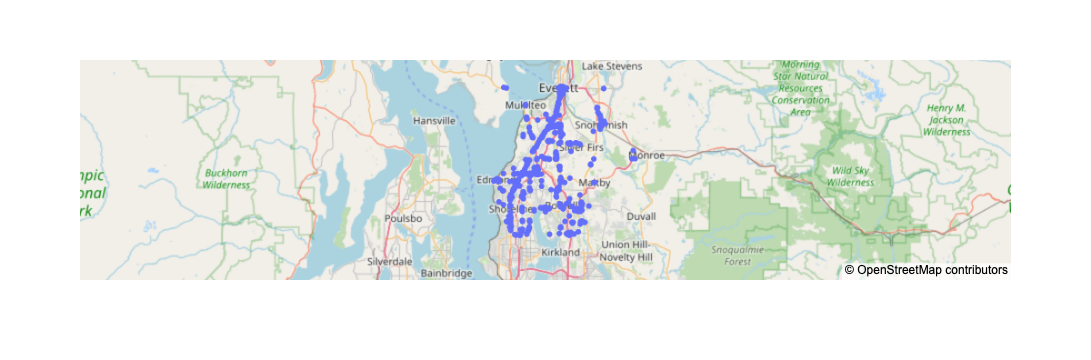

In [17]:
## add hover_name (name) and hover_data for price,rating,location
px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', mapbox_style = 'open-street-map', 
                 hover_name = 'name', hover_data = ['price', 'rating', 'transactions', 'location'])

### Fixing the Location Column

In [18]:
## slice out a test address
test_addr = df.loc[0, 'location']
test_addr

"{'address1': '130 Ave D', 'address2': None, 'address3': '', 'city': 'Snohomish', 'zip_code': '98290', 'country': 'US', 'state': 'WA', 'display_address': ['130 Ave D', 'Snohomish, WA 98290']}"

> Also a string-dictionary...

In [19]:
## replace ' with "
df['location'] = df['location'].str.replace("'", '"')
df

id                        alias                name  \
0    f4rnFr_bFWOB44crXfFMbQ        j-and-l-bbq-snohomish           J & L BBQ   
1    GAq0SZKYEeWN71hC0FHYrQ          j-and-l-bbq-everett           J & L BBQ   
2    ZIRJB-lk5cD4L8GUOca3zw          fat-pig-bbq-edmonds         Fat Pig BBQ   
3    njvyS8D09NfOhIDbEjNhEg  larrys-smokehouse-snohomish  Larry's Smokehouse   
4    D_ClecX3hizRwnQyamtf6g   carolina-smoke-bbq-bothell  Carolina Smoke BBQ   
..                      ...                          ...                 ...   
715  EejfmNOpmdDW_TBXPXRLtQ        mcdonalds-shoreline-2          McDonald's   
716  kt3nZlQecIRtgyyZXkpFYQ        papa-murphys-kirkland       Papa Murphy's   
717  An3xdX7QQIvaqSFpUTXEHw               arbys-lynnwood              Arby's   
718  E59cme4iV3QLbAbyM3WyeQ           subway-seattle-147              Subway   
719  RPWDdCgyRyKXuitQgJXRLg     brooklyn-calzone-everett    Brooklyn Calzone   

                                             image_url  is_closed  \
0    https://s3-media1.fl.yelpcdn.com/bphoto/2z6_9B...      False   
1    https://s3-media3.fl.yelpcdn.com/bphoto/OTdSHc...      False   
2    https://s3-media2.fl.yelpcdn.com/bphoto/Xdbg4J...      False   
3    https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4    https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   
..                                                 ...        ...   
715  https://s3-media2.fl.yelpcdn.com/bphoto/CQVB9l...      False   
716  https://s3-media2.fl.yelpcdn.com/bphoto/ZU4vkD...      False   
717  https://s3-media1.fl.yelpcdn.com/bphoto/tnRk0k...      False   
718  https://s3-media1.fl.yelpcdn.com/bphoto/1PsDFi...      False   
719  https://s3-media2.fl.yelpcdn.com/bphoto/Vs9_lZ...      False   

                                                   url  review_count  \
0    https://www.yelp.com/biz/j-and-l-bbq-snohomish...           298   
1    https://www.yelp.com/biz/j-and-l-bbq-everett?a...           137   
2    https://www.yelp.com/biz/fat-pig-bbq-edmonds?a...           289   
3    https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4    https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   
..                                                 ...           ...   
715  https://www.yelp.com/biz/mcdonalds-shoreline-2...            78   
716  https://www.yelp.com/biz/papa-murphys-kirkland...            56   
717  https://www.yelp.com/biz/arbys-lynnwood?adjust...            69   
718  https://www.yelp.com/biz/subway-seattle-147?ad...            32   
719  https://www.yelp.com/biz/brooklyn-calzone-ever...             1   

                                            categories  rating  \
0              [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
1    [{'alias': 'tradamerican', 'title': 'American'...     4.5   
2              [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
3    [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4              [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   
..                                                 ...     ...   
715  [{'alias': 'burgers', 'title': 'Burgers'}, {'a...     2.0   
716             [{'alias': 'pizza', 'title': 'Pizza'}]     3.0   
717  [{'alias': 'hotdogs', 'title': 'Fast Food'}, {...     2.0   
718  [{'alias': 'sandwiches', 'title': 'Sandwiches'...     3.0   
719             [{'alias': 'pizza', 'title': 'Pizza'}]     1.0   

               transactions price  \
0    ['pickup', 'delivery']    $$   
1              ['delivery']    $$   
2    ['pickup', 'delivery']    $$   
3    ['pickup', 'delivery']     $   
4    ['pickup', 'delivery']    $$   
..                      ...   ...   
715            ['delivery']     $   
716  ['pickup', 'delivery']    $$   
717                      []     $   
718  ['pickup', 'delivery']     $   
719            ['delivery']   NaN   

                                              location         phone  \
0    {"address1": "130 Ave D", "address2": None, "a...  1.36

In [20]:
## apply json.loads
df['location'] = df['location'].apply(json.loads)

JSONDecodeError: Expecting value: line 1 column 39 (char 38)

# > Ruh roh....

- Hmm, let's slice out a test_address again and let's write a function to accomplish this instead.
    - We can use try and except in our function to get around the errors.

### Fixing Addresses - with a custom function


In [21]:
## slice out test address 
test_addr = df.loc[0, 'location']
test_addr

'{"address1": "130 Ave D", "address2": None, "address3": "", "city": "Snohomish", "zip_code": "98290", "country": "US", "state": "WA", "display_address": ["130 Ave D", "Snohomish, WA 98290"]}'

In [22]:
## write a function to just run json.loads on the address
def fix_address(test_addr):
    try:
        return json.loads(test_addr)
    except:
        return 'Error'

In [23]:
## test applying our function
df['location'].apply(fix_address)

0                                                  Error
1                                                  Error
2                                                  Error
3      {'address1': '17416 State Route 9', 'address2'...
4      {'address1': '24118 Bothell Everett Hwy', 'add...
                             ...                        
715    {'address1': '15201 Aurora Ave N', 'address2':...
716    {'address1': '11312 NE 124th St', 'address2': ...
717    {'address1': '4910 196th St SW', 'address2': '...
718    {'address1': '18002 15th Ave NE', 'address2': ...
719                                                Error
Name: location, Length: 720, dtype: object

- It worked! Now let's save this as a new column (display_location),
and then let's investigate the businesses that had an "ERROR".

In [24]:
### save a new display_location column using our function
df['display_location'] = df['location'].apply(fix_address)

In [25]:
## filter for businesses with display_location == "ERROR"
errors = df[df['display_location'] == 'Error']
errors.head()

id                           alias  \
0  f4rnFr_bFWOB44crXfFMbQ           j-and-l-bbq-snohomish   
1  GAq0SZKYEeWN71hC0FHYrQ             j-and-l-bbq-everett   
2  ZIRJB-lk5cD4L8GUOca3zw             fat-pig-bbq-edmonds   
5  6jr4aZ1eMLadC0FntrXKgw  dickeys-barbecue-pit-everett-3   
7  aGyck-ohu3pnwtWHgCEHKQ    wake-n-bacon-bbq-shoreline-2   

                    name                                          image_url  \
0              J & L BBQ  https://s3-media1.fl.yelpcdn.com/bphoto/2z6_9B...   
1              J & L BBQ  https://s3-media3.fl.yelpcdn.com/bphoto/OTdSHc...   
2            Fat Pig BBQ  https://s3-media2.fl.yelpcdn.com/bphoto/Xdbg4J...   
5  Dickey's Barbecue Pit  https://s3-media3.fl.yelpcdn.com/bphoto/mSZAuS...   
7       Wake N Bacon BBQ  https://s3-media2.fl.yelpcdn.com/bphoto/sHJ0At...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/j-and-l-bbq-snohomish...           298   
1      False  https://www.yelp.com/biz/j-and-l-bbq-everett?a...           137   
2      False  https://www.yelp.com/biz/fat-pig-bbq-edmonds?a...           289   
5      False  https://www.yelp.com/biz/dickeys-barbecue-pit-...           209   
7      False  https://www.yelp.com/biz/wake-n-bacon-bbq-shor...           122   

                                          categories  rating  \
0            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
1  [{'alias': 'tradamerican', 'title': 'American'...     4.5   
2            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   
5  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
7            [{'alias': 'bbq', 'title': 'Barbeque'}]     4.5   

             transactions price  \
0  ['pickup', 'delivery']    $$   
1            ['delivery']    $$   
2  ['pickup', 'delivery']    $$   
5  ['pickup', 'delivery']    $$   
7  ['pickup', 'delivery']    $$   

                                            location         phone  \
0  {"address1": "130 Ave D", "address2": None, "a...  1.360569e+10   
1  {"address1": "2915 Colby Ave", "address2": "",...  1.425259e+10   
2  {"address1": "7533 Olympic View Dr", "address2...  1.425362e+10   
5  {"address1": "617 SW 128th St", "address2": "S...  1.425265e+10   
7  {"address1": "1437 NW Richmond Beach Rd", "add...  1.206543e+10   

    display_phone      distance   latitude   longitude display_location  
0  (360) 568-7222  10622.755887  47.912780 -122.098820            Error  
1  (425) 259-3222  14830.981444  47.978620 -122.208190            Error  
2  (425) 361-7640  10346.304888  47.831572 -122.336643            Error  
5  (425) 265-0041   5180.721616  47.882387 -122.241739            Error  
7  (206) 542-8881  15708.836633  47.769365 -122.376857            Error

In [26]:
## slice out a new test address and inspect
test_addr = df.loc[7, 'location']
test_addr

'{"address1": "1437 NW Richmond Beach Rd", "address2": "", "address3": None, "city": "Shoreline", "zip_code": "98177", "country": "US", "state": "WA", "display_address": ["1437 NW Richmond Beach Rd", "Shoreline, WA 98177"]}'

> After some more investigation, we would find a few issues with these "ERROR" rows.
1. They contained None.
2. They contained an apostrophe in the name.
3. ...?

### Possible Fixes (if we care to/have the time)


- Use Regular Expressions to find an fix the display addresses with " ' " in them
- Use string split to split on the word display address.
    - Then use string methods to clean up

### Moving Forward without those rows (for now)

In [27]:
## remove any rows where display_location == 'ERROR'
df = df.loc[df['display_location'] != 'Error']
df.head()

id                                alias  \
3   njvyS8D09NfOhIDbEjNhEg          larrys-smokehouse-snohomish   
4   D_ClecX3hizRwnQyamtf6g           carolina-smoke-bbq-bothell   
6   RmLxbaA32FB0D6l3Rm-TnA        best-of-both-worlds-snohomish   
9   dlzTLbbPLwq-J7HRnmSAbg      gabriels-fire-mountlake-terrace   
12  a0peClYQHiw5vUPTXl528w  niku-niku-japanese-barbecue-seattle   

                           name  \
3            Larry's Smokehouse   
4            Carolina Smoke BBQ   
6           Best of Both Worlds   
9                Gabriel's Fire   
12  Niku Niku Japanese Barbecue   

                                            image_url  is_closed  \
3   https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4   https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/BuzAXU...      False   
9   https://s3-media3.fl.yelpcdn.com/bphoto/oFn74c...      False   
12  https://s3-media1.fl.yelpcdn.com/bphoto/LazyS4...      False   

                                                  url  review_count  \
3   https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4   https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   
6   https://www.yelp.com/biz/best-of-both-worlds-s...            16   
9   https://www.yelp.com/biz/gabriels-fire-mountla...           467   
12  https://www.yelp.com/biz/niku-niku-japanese-ba...           277   

                                           categories  rating  \
3   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4             [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   
6   [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
9             [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
12  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   

                  transactions price  \
3       ['pickup', 'delivery']     $   
4       ['pickup', 'delivery']    $$   
6       ['pickup', 'delivery']   NaN   
9       ['pickup', 'delivery']    $$   
12  ['restaurant_reservation']   NaN   

                                             location         phone  \
3   {"address1": "17416 State Route 9", "address2"...  1.425484e+10   
4   {"address1": "24118 Bothell Everett Hwy", "add...  1.425950e+10   
6   {"address1": "1830 Bickford Ave", "address2": ...  1.425273e+10   
9   {"address1": "5803 244th St SW", "address2": "...  1.425697e+10   
12  {"address1": "13200 Aurora Ave N", "address2":...  1.206588e+10   

     display_phone      distance   latitude   longitude  \
3   (425) 483-7001   5611.595646  47.839407 -122.124891   
4   (425) 949-8672   7573.454942  47.778498 -122.218753   
6   (425) 272-5386  12160.356077  47.934462 -122.105021   
9   (425) 697-4119  11219.380800  47.777720 -122.311040   
12  (206) 588-1027  17177.457879  47.724800 -122.343278   

                                     display_location  
3   {'address1': '17416 State Route 9', 'address2'...  
4   {'address1': '24118 Bothell Everett Hwy', 'add...  
6   {'address1': '1830 Bickford Ave', 'address2': ...  
9   {'address1': '5803 244th St SW', 'address2': '...  
12  {'address1': '13200 Aurora Ave N', 'address2':...

- We want the "display_address" key from the "display_location" dictionaries.
- We could use a .apply and a lamda to slice out the desired key.

In [28]:
## slice out a new test address and inspect
test_addr = df.loc[9, 'display_location']['display_address']
test_addr

['5803 244th St SW', 'Mountlake Terrace, WA 98043']

In [29]:
## use apply and lambda to slice correct key
df['display_address'] = df['display_location'].apply(lambda x: x['display_address'])
df.head(2)

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/2958427817.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id                        alias                name  \
3  njvyS8D09NfOhIDbEjNhEg  larrys-smokehouse-snohomish  Larry's Smokehouse   
4  D_ClecX3hizRwnQyamtf6g   carolina-smoke-bbq-bothell  Carolina Smoke BBQ   

                                           image_url  is_closed  \
3  https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   

                                                 url  review_count  \
3  https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4  https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   

                                          categories  rating  \
3  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4            [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   

             transactions price  \
3  ['pickup', 'delivery']     $   
4  ['pickup', 'delivery']    $$   

                                            location         phone  \
3  {"address1": "17416 State Route 9", "address2"...  1.425484e+10   
4  {"address1": "24118 Bothell Everett Hwy", "add...  1.425950e+10   

    display_phone     distance   latitude   longitude  \
3  (425) 483-7001  5611.595646  47.839407 -122.124891   
4  (425) 949-8672  7573.454942  47.778498 -122.218753   

                                    display_location  \
3  {'address1': '17416 State Route 9', 'address2'...   
4  {'address1': '24118 Bothell Everett Hwy', 'add...   

                                     display_address  
3  [17416 State Route 9, A 106, Snohomish, WA 98296]  
4  [24118 Bothell Everett Hwy, Bldg E100, Bothell...

- Almost done! We want to convert display_address to a string instead of a list of strings.
- We can use the string method .join to do so!

In [30]:
## slice out a test_address
test_add = df.loc[9, 'display_address']
test_add

['5803 244th St SW', 'Mountlake Terrace, WA 98043']

In [31]:
## test using .join with a "\n"
'\n'.join(test_add)
print('\n'.join(test_add))

5803 244th St SW
Mountlake Terrace, WA 98043


In [32]:
## apply the join to every row with a lambda
df['address'] = df['display_address'].apply(lambda x: '\n'.join(x))
df.head()

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/3043997693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id                                alias  \
3   njvyS8D09NfOhIDbEjNhEg          larrys-smokehouse-snohomish   
4   D_ClecX3hizRwnQyamtf6g           carolina-smoke-bbq-bothell   
6   RmLxbaA32FB0D6l3Rm-TnA        best-of-both-worlds-snohomish   
9   dlzTLbbPLwq-J7HRnmSAbg      gabriels-fire-mountlake-terrace   
12  a0peClYQHiw5vUPTXl528w  niku-niku-japanese-barbecue-seattle   

                           name  \
3            Larry's Smokehouse   
4            Carolina Smoke BBQ   
6           Best of Both Worlds   
9                Gabriel's Fire   
12  Niku Niku Japanese Barbecue   

                                            image_url  is_closed  \
3   https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4   https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/BuzAXU...      False   
9   https://s3-media3.fl.yelpcdn.com/bphoto/oFn74c...      False   
12  https://s3-media1.fl.yelpcdn.com/bphoto/LazyS4...      False   

                                                  url  review_count  \
3   https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4   https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   
6   https://www.yelp.com/biz/best-of-both-worlds-s...            16   
9   https://www.yelp.com/biz/gabriels-fire-mountla...           467   
12  https://www.yelp.com/biz/niku-niku-japanese-ba...           277   

                                           categories  rating  \
3   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4             [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   
6   [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
9             [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
12  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   

                  transactions price  \
3       ['pickup', 'delivery']     $   
4       ['pickup', 'delivery']    $$   
6       ['pickup', 'delivery']   NaN   
9       ['pickup', 'delivery']    $$   
12  ['restaurant_reservation']   NaN   

                                             location         phone  \
3   {"address1": "17416 State Route 9", "address2"...  1.425484e+10   
4   {"address1": "24118 Bothell Everett Hwy", "add...  1.425950e+10   
6   {"address1": "1830 Bickford Ave", "address2": ...  1.425273e+10   
9   {"address1": "5803 244th St SW", "address2": "...  1.425697e+10   
12  {"address1": "13200 Aurora Ave N", "address2":...  1.206588e+10   

     display_phone      distance   latitude   longitude  \
3   (425) 483-7001   5611.595646  47.839407 -122.124891   
4   (425) 949-8672   7573.454942  47.778498 -122.218753   
6   (425) 272-5386  12160.356077  47.934462 -122.105021   
9   (425) 697-4119  11219.380800  47.777720 -122.311040   
12  (206) 588-1027  17177.457879  47.724800 -122.343278   

                                     display_location  \
3   {'address1': '17416 State Route 9', 'address2'...   
4   {'address1': '24118 Bothell Everett Hwy', 'add...   
6   {'address1': '1830 Bickford Ave', 'address2': ...   
9   {'address1': '5803 244th St SW', 'address2': '...   
12  {'address1': '13200 Aurora Ave N', 'address2':...   

                                      display_address  \
3   [17416 State Route 9, A 106, Snohomish, WA 98296]   
4   [24118 Bothell Everett Hwy, Bldg E100, Bothell...   
6   [1830 Bickford Ave, Ste 111, Snohomish, WA 98290]   
9     [5803 244th St SW, Mountlake Terrace, WA 98043]   
12     [13200 Aurora Ave N, Ste G, Seattle, WA 98133]   

                                              address  
3     17416 State Route 9\nA 106\nSnohomish, WA 98296  
4   24118 Bothell Everett Hwy\nBldg E100\nBothell,...  
6     1830 Bickford Ave\nSte 111\nSnohomish, WA 98290  
9       5803 244th St SW\nMountlake Terrace, WA 98043  
12       13200 Aurora Ave N\nSte G\nSeattle, WA 98133

In [33]:
test_add = df.loc[9, 'address']
test_add

'5803 244th St SW\nMountlake Terrace, WA 98043'

### Lastly, Fixing Transactions Column

In [34]:
# Looking at a test transaction
test_transaction = df.loc[9, 'transactions']
test_transaction

"['pickup', 'delivery']"

In [35]:
type(test_transaction)

str

- This is also a string and needs to be converted to a list.

In [36]:
# Replacing single ' with double "
saved_test = test_transaction.replace("'", '"')
saved_test

'["pickup", "delivery"]'

In [37]:
# Using json.loads on saved_test
json.loads(saved_test)

['pickup', 'delivery']

In [38]:
# Applying transformations to entire column

# Create a new column where the single quotes are replaced with double quotes
df['transactions_split'] = df['transactions'].str.replace("'", '"')
# Apply json.loads to entire column
df['transactions_split'] = df['transactions_split'].apply(json.loads)
df['transactions_split'].head()

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/3046230872.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/3046230872.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3           [pickup, delivery]
4           [pickup, delivery]
6           [pickup, delivery]
9           [pickup, delivery]
12    [restaurant_reservation]
Name: transactions_split, dtype: object

In [39]:
df['transactions_split'].value_counts()

[pickup, delivery]                            168
[delivery]                                    138
[delivery, pickup]                            117
[]                                             62
[pickup]                                       10
[restaurant_reservation]                        1
[delivery, pickup, restaurant_reservation]      1
[restaurant_reservation, pickup, delivery]      1
Name: transactions_split, dtype: int64

In [40]:
# Converting transactions column into a one-hot-encoded column
exploded = df.explode('transactions_split')
exploded[['name', 'transactions', 'transactions_split']].head()

name            transactions transactions_split
3   Larry's Smokehouse  ['pickup', 'delivery']             pickup
3   Larry's Smokehouse  ['pickup', 'delivery']           delivery
4   Carolina Smoke BBQ  ['pickup', 'delivery']             pickup
4   Carolina Smoke BBQ  ['pickup', 'delivery']           delivery
6  Best of Both Worlds  ['pickup', 'delivery']             pickup

In [41]:
# remove NaNs and find unique values
cols_to_make = exploded['transactions_split'].dropna().unique()
cols_to_make

array(['pickup', 'delivery', 'restaurant_reservation'], dtype=object)

In [42]:
# Using a for loop with .str.contains to create new columns
for col in cols_to_make:
    df[col] = df['transactions'].str.contains(col)
df.head()

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/1341322893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/1341322893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/td/cybzgn316hq8r5cn05lb0y2m0000gn/T/ipykernel_16022/1341322893.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

id                                alias  \
3   njvyS8D09NfOhIDbEjNhEg          larrys-smokehouse-snohomish   
4   D_ClecX3hizRwnQyamtf6g           carolina-smoke-bbq-bothell   
6   RmLxbaA32FB0D6l3Rm-TnA        best-of-both-worlds-snohomish   
9   dlzTLbbPLwq-J7HRnmSAbg      gabriels-fire-mountlake-terrace   
12  a0peClYQHiw5vUPTXl528w  niku-niku-japanese-barbecue-seattle   

                           name  \
3            Larry's Smokehouse   
4            Carolina Smoke BBQ   
6           Best of Both Worlds   
9                Gabriel's Fire   
12  Niku Niku Japanese Barbecue   

                                            image_url  is_closed  \
3   https://s3-media3.fl.yelpcdn.com/bphoto/7R7k4X...      False   
4   https://s3-media3.fl.yelpcdn.com/bphoto/NqM0cv...      False   
6   https://s3-media4.fl.yelpcdn.com/bphoto/BuzAXU...      False   
9   https://s3-media3.fl.yelpcdn.com/bphoto/oFn74c...      False   
12  https://s3-media1.fl.yelpcdn.com/bphoto/LazyS4...      False   

                                                  url  review_count  \
3   https://www.yelp.com/biz/larrys-smokehouse-sno...           176   
4   https://www.yelp.com/biz/carolina-smoke-bbq-bo...           484   
6   https://www.yelp.com/biz/best-of-both-worlds-s...            16   
9   https://www.yelp.com/biz/gabriels-fire-mountla...           467   
12  https://www.yelp.com/biz/niku-niku-japanese-ba...           277   

                                           categories  rating  \
3   [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     3.5   
4             [{'alias': 'bbq', 'title': 'Barbeque'}]     3.5   
6   [{'alias': 'foodtrucks', 'title': 'Food Trucks...     4.5   
9             [{'alias': 'bbq', 'title': 'Barbeque'}]     4.0   
12  [{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...     4.5   

                  transactions  ...      distance   latitude   longitude  \
3       ['pickup', 'delivery']  ...   5611.595646  47.839407 -122.124891   
4       ['pickup', 'delivery']  ...   7573.454942  47.778498 -122.218753   
6       ['pickup', 'delivery']  ...  12160.356077  47.934462 -122.105021   
9       ['pickup', 'delivery']  ...  11219.380800  47.777720 -122.311040   
12  ['restaurant_reservation']  ...  17177.457879  47.724800 -122.343278   

                                     display_location  \
3   {'address1': '17416 State Route 9', 'address2'...   
4   {'address1': '24118 Bothell Everett Hwy', 'add...   
6   {'address1': '1830 Bickford Ave', 'address2': ...   
9   {'address1': '5803 244th St SW', 'address2': '...   
12  {'address1': '13200 Aurora Ave N', 'address2':...   

                                      display_address  \
3   [17416 State Route 9, A 106, Snohomish, WA 98296]   
4   [24118 Bothell Everett Hwy, Bldg E100, Bothell...   
6   [1830 Bickford Ave, Ste 111, Snohomish, WA 98290]   
9     [5803 244th St SW, Mountlake Terrace, WA 98043]   
12     [13200 Aurora Ave N, Ste G, Seattle, WA 98133]   

                                              address  \
3     17416 State Route 9\nA 106\nSnohomish, WA 98296   
4   24118 Bothell Everett Hwy\nBldg E100\nBothell,...   
6     1830 Bickford Ave\nSte 111\nSnohomish, WA 98290   
9       5803 244th St SW\nMountlake Terrace, WA 98043   
12       13200 Aurora Ave N\nSte G\nSeattle, WA 98133   

          transactions_split pickup delivery restaurant_reservation  
3         [pickup, delivery]   True     True                  False  
4         [pickup, delivery]   True     True                  False  
6         [pickup, delivery]   True     True                  False  
9         [pickup, delivery]   True     True                  False  
12  [restaurant_reservation]  False    False                   True  

[5 rows x 24 columns]

### Final Map

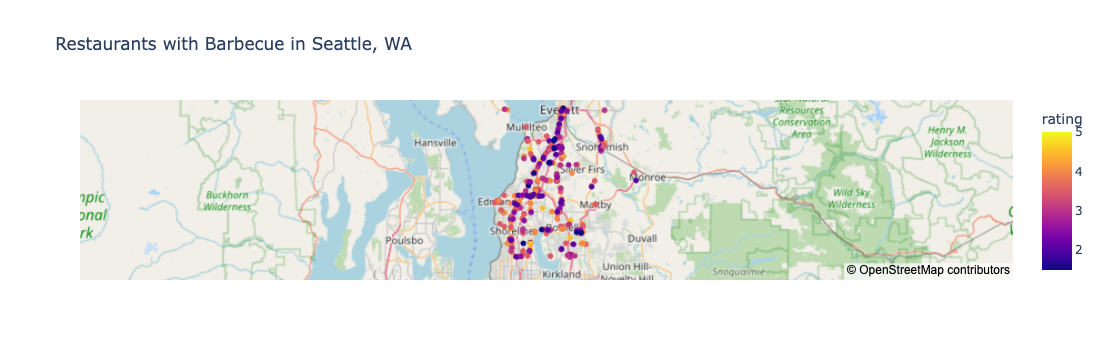

In [43]:
## make our final map and save as varaible
pfig = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', 
                        mapbox_style = 'open-street-map', hover_name = 'name',
                         hover_data = ['price', 'rating', 'address', 'pickup', 
                                      'delivery'],
                         color = 'rating',
                         title = 'Restaurants with Barbecue in Seattle, WA')

pfig.show()